In [1]:
import warnings;
warnings.filterwarnings('ignore');
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.cluster import KMeans

X=data.drop('Class',axis=1)
Y=data.Class


In [2]:
#Importing the data
data=pd.read_csv('creditcard.csv')

In [3]:
#Taking a Peak at Features and Observations
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Check for missing Values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0    284315
1       492
Name: Class, dtype: int64

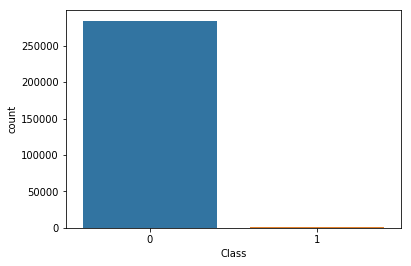

In [5]:
#Check for Imbalanced data
sb.countplot(data.Class)
data.Class.value_counts()

In [6]:
#Scaling Time and Amount as all the other fetaures are scaled already
from sklearn.preprocessing import RobustScaler

scaled_Amount=RobustScaler().fit_transform(data.Amount.values.reshape(-1,1))
scaled_Time=RobustScaler().fit_transform(data.Amount.values.reshape(-1,1))

In [7]:
data.drop(['Amount','Time'],axis=1,inplace=True)
data.insert(0,'Scaled Amount',scaled_Amount)
data.insert(1,'Scaled Time',scaled_Time)

In [8]:
X=data.drop('Class',axis=1)
Y=data.Class


In [9]:
#Splitting my Original Data set in Train and Test samples
#We will not be using these training samples as these are very unbalanced,we will be implementing under sampling and oversampling
#However, We will be using Test samples  created here to test the data set once it has been trained using under sampling or overampling techniques.
from sklearn.model_selection import StratifiedShuffleSplit

for train_index_number,test_index_number in StratifiedShuffleSplit().split(X,Y):
    original_x_train,original_x_test=X.iloc[train_index_number],X.iloc[test_index_number]
    original_y_train,original_y_test=Y.iloc[train_index_number],Y.iloc[test_index_number]


In [10]:
#Checking that the percentage of Fraud and Non-fraud Cases in Original,Training  and Testing data Set

non_fraud_cases,fraud_cases=Y.value_counts()
print(f'Percentage of Fraud Cases Present before Splitting: {(fraud_cases/(fraud_cases+non_fraud_cases))*100}')

non_fraud_after_split_training,fraud_after_split_training=original_y_train.value_counts()
print(f'Percentage of Fraud Cases in Training dataset {(fraud_after_split_training/(fraud_after_split_training+non_fraud_after_split_training))*100}')

non_fraud_test,fraud_test_test=original_y_test.value_counts()
print(f'Percentage of Fraud Cases in Testing dataset {(fraud_test_test/(fraud_test_test+non_fraud_test))*100}')


Percentage of Fraud Cases Present before Splitting: 0.1727485630620034
Percentage of Fraud Cases in Training dataset 0.17282679088348432
Percentage of Fraud Cases in Testing dataset 0.17204452090867595


<h2>Impliment Under sampling</h2>

In [11]:
data=data.sample(frac=1)
non_fraud_data=data[data.Class==0]
temp_non_fraud=non_fraud_data[:492]
fraud_data=data[data.Class==1]
Undersampled_data=pd.concat([temp_non_fraud,fraud_data])
Undersampled_data=Undersampled_data.sample(frac=1)

<h1>Feature Selection</h1>

<h1>Filter Methods<h1>


<h2>Method-1 Using Variance Threshold for removing Constant/QConstant Features and finding Duplicate features</h2>
<h2>This method will not be effective here as the data is Already Scaled i.e. it has unit variance</h2>

In [12]:
from sklearn.feature_selection import VarianceThreshold

In [13]:
#Finding Constant features
selector=VarianceThreshold(threshold=0)
selector.fit(Undersampled_data)
constant_features=Undersampled_data.columns[selector.get_support()]

In [14]:
#Finding Qconstant Features
qselector=VarianceThreshold(threshold=0.01)
qselector.fit(Undersampled_data)
qConstant_Features=Undersampled_data.columns[qselector.get_support()]

<h2>Finding Duplicate Coloumns</h2>

In [15]:
Undersampled_data_transpose=Undersampled_data.T
Undersampled_data_transpose.duplicated().sum()
Undersampled_data=Undersampled_data_transpose.drop_duplicates().T

<h2>Method 2- Finding Correlation With Label and removing the features that have a very strong Corelation</h2>

In [16]:
#Identifying Highly Corelated Features amongs all the features in data Set
highly_correlated_features=set()
correlation_matrix=Undersampled_data.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i,j]>0.8 or correlation_matrix.iloc[i,j]<-0.8:
            coloumn_name=correlation_matrix.columns[i]
            highly_correlated_features.add(coloumn_name)
highly_correlated_features

{'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V3', 'V5', 'V7'}

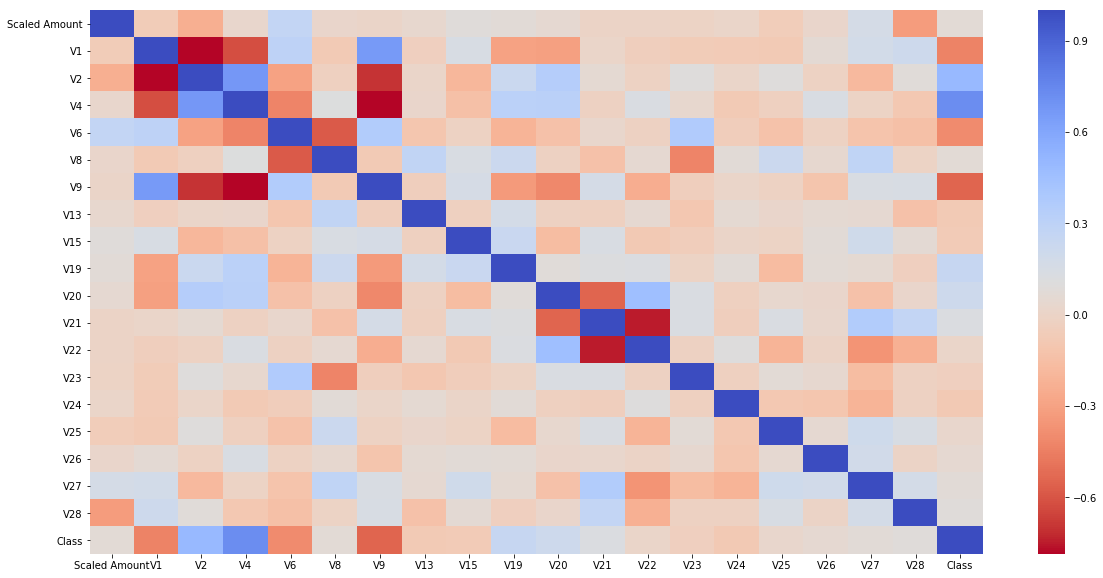

In [17]:
Undersampled_data_after_feature_selection=Undersampled_data.drop(highly_correlated_features,axis=1)
plt.figure(figsize=[20,10])
sb.heatmap(Undersampled_data_after_feature_selection.corr(),cmap='coolwarm_r')

<h2> Using SelectK best features</h2>

<h3>We can use the above method if we want to reduce the no of features more and also if we want to filter variables in corelation with Label</h3>

In [18]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [19]:
#Getting X and Y from undersampled data
X_undersampled=Undersampled_data_after_feature_selection.drop('Class',axis=1)
Y_undersampled=Undersampled_data_after_feature_selection.Class

#Finding Training and testing Sets
from sklearn.model_selection import train_test_split

undersample_x_train,undersample_x_test,undersample_y_train,undersample_y_test=train_test_split(X_undersampled,Y_undersampled)

In [20]:
k_best_selector=SelectKBest(score_func=f_classif,k=10)
k_best_selector.fit(X_undersampled,Y_undersampled)

SelectKBest(k=10, score_func=<function f_classif at 0x1a1d809a60>)

In [21]:
k_best_selector.get_support()
X_undersampled.columns[k_best_selector.get_support()]

Index(['V1', 'V2', 'V4', 'V6', 'V9', 'V19', 'V20', 'V21', 'V24', 'V28'], dtype='object')

<h1>Outlier Detection</h1>

#We can check all the features for outliers but for now we will only check those features which have a strong co-relation with Label

In [22]:
def OutlierRemoval_UnderSampling(columnname):
    US_q25=np.percentile(Undersampled_data_after_feature_selection[columnname],25)
    US_q75=np.percentile(Undersampled_data_after_feature_selection[columnname],75)
    US_IQR=US_q75-US_q25
    US_Cut_off=US_IQR*1.5
    US_upper=US_q75+US_Cut_off
    US_lower=US_q25-US_Cut_off
    index_values=Undersampled_data_after_feature_selection[(Undersampled_data_after_feature_selection[columnname]>US_upper)|(Undersampled_data_after_feature_selection[columnname]<US_lower)].index
    Undersampled_data_after_feature_selection.drop(index_values)

In [23]:
for col in Undersampled_data_after_feature_selection.columns:
    OutlierRemoval_UnderSampling(col)

<h2>Implement machine Learning</h2>

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [25]:
X=Undersampled_data_after_feature_selection.drop('Class',axis=1)
Y=Undersampled_data_after_feature_selection.Class
clustering=KMeans(n_clusters=2)
kmeans_predict=clustering.fit_predict(X)

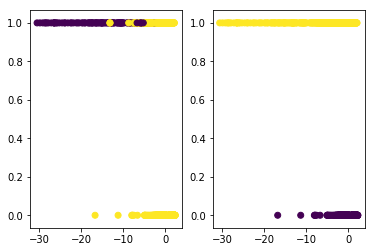

In [26]:
plt.subplot(1,2,1)
plt.scatter(x=Undersampled_data_after_feature_selection.V1,y=Undersampled_data_after_feature_selection.Class,c=clustering.labels_)

plt.subplot(1,2,2)
plt.scatter(x=Undersampled_data_after_feature_selection.V1,y=Undersampled_data_after_feature_selection.Class,c=Undersampled_data_after_feature_selection.Class)

In [27]:
pca=PCA(n_components=2)
principle_components=pca.fit_transform(X)

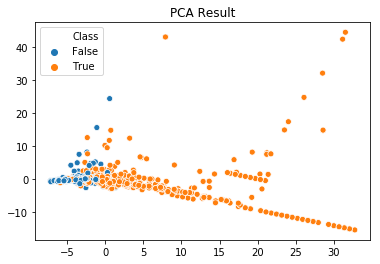

In [28]:
plt.title('PCA Result')
sb.scatterplot(x=principle_components[:,0],y=principle_components[:,1],hue=(Y==1))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [30]:
classifiers=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

In [31]:
for classifier in classifiers:
    classifier.fit(undersample_x_train,undersample_y_train)
    cv_score=cross_val_score(classifier,undersample_x_train,undersample_y_train,cv=15)
    print(f"With Default Parameters The accuracy Score of {classifier.__class__.__name__} is: {round(cv_score.mean()*100,2)}%")


With Default Parameters The accuracy Score of LogisticRegression is: 92.01%
With Default Parameters The accuracy Score of KNeighborsClassifier is: 91.06%
With Default Parameters The accuracy Score of RandomForestClassifier is: 90.79%
With Default Parameters The accuracy Score of GradientBoostingClassifier is: 91.47%


In [32]:
from sklearn.model_selection import GridSearchCV

log_reg_param={'penalty':['l1','l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
K_neigber_param={"n_neighbors": [2,3,4,5], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
random_forest_param={'n_estimators':[60,70,80,90,100,110,120,130,140,150,160,170],'criterion':['gini','entropy'],'max_features':[3,4,5,6,'auto']}
Gradient_boosting_param={'n_estimators':[60,70,80,90,100,110,120,130,140,150,160,170],'learning_rate':list([0.001, 0.01, 0.1, 1, 10, 100, 1000]),
                                         'criterion':['friedman_mse','mse','mae'],
                                         'max_features':[3,4,5,6,7,'auto']}

In [33]:
log_reg=GridSearchCV(LogisticRegression(),log_reg_param)
fit_log_reg=log_reg.fit(undersample_x_train,undersample_y_train)
log_reg_best_param=fit_log_reg.best_estimator_

K_neigber=GridSearchCV(KNeighborsClassifier(),K_neigber_param)
fit_k_Neighber=K_neigber.fit(undersample_x_train,undersample_y_train)
k_neigber_best_param=fit_k_Neighber.best_estimator_

random_forest=GridSearchCV(RandomForestClassifier(),random_forest_param)
fit_random_forest=random_forest.fit(undersample_x_train,undersample_y_train)
random_forest_best_param=fit_random_forest.best_estimator_


#Coputaionaly very expensive to run
gradient_boosting=GridSearchCV(GradientBoostingClassifier(),Gradient_boosting_param)
fit_grad_boost=gradient_boosting.fit(undersample_x_train,undersample_y_train)
grad_boost_best_param=fit_grad_boost.best_estimator_

In [34]:
log_reg_cross_val_score=cross_val_score(log_reg_best_param,undersample_x_train,undersample_y_train,cv=15)
print(f' Logistic Regression :{round(log_reg_cross_val_score.mean(),2)*100}%')

k_neigber_classifier=cross_val_score(k_neigber_best_param,undersample_x_train,undersample_y_train,cv=15)
print(f'KNeigbersClassifier :{round(k_neigber_classifier.mean(),2)*100}%')

Random_Forest_cross_val_score=cross_val_score(random_forest_best_param,undersample_x_train,undersample_y_train,cv=15)
print(f' Random Forest :{round(log_reg_cross_val_score.mean(),2)*100}%')

#Graident_boost_cross_val=cross_val_score(grad_boost_best_param,undersample_x_train,undersample_y_train)
#print(f'graident bossting :{round(Graident_boost_cross_val.mean(),2)*100}%')


 Logistic Regression :92.0%
KNeigbersClassifier :91.0%
 Random Forest :92.0%


<h3>learning Curve</h3>

If the Gap between training and Testing score is big then our model is overfitting.
If the gap is less but the scores are low then Underfitting is happening.

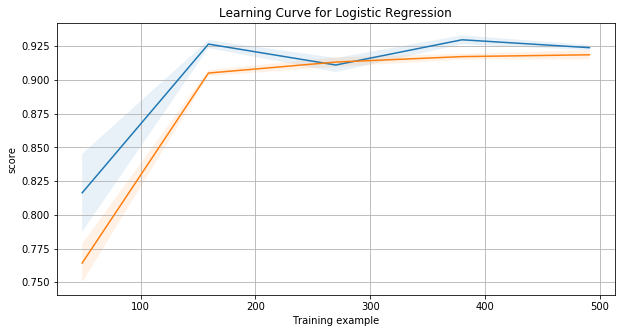

In [35]:
from sklearn.model_selection import learning_curve

train_size,train_score,test_score=learning_curve(estimator=log_reg_best_param,X=undersample_x_train,y=undersample_y_train)
train_score_mean=np.mean(train_score,axis=1)
train_score_std=np.std(train_score,axis=1)
test_score_mean=np.mean(test_score,axis=1)
test_score_std=np.std(test_score,axis=1)

plt.figure(figsize=[10,5])
plt.title("Learning Curve for Logistic Regression")
plt.xlabel('Training example')
plt.ylabel('score')
plt.grid()
plt.fill_between(train_size,train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.1)
plt.fill_between(train_size,test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1)
plt.plot(train_size,train_score_mean,label='Training Score')
plt.plot(train_size,test_score_mean,label='Testing Score')
plt.show()

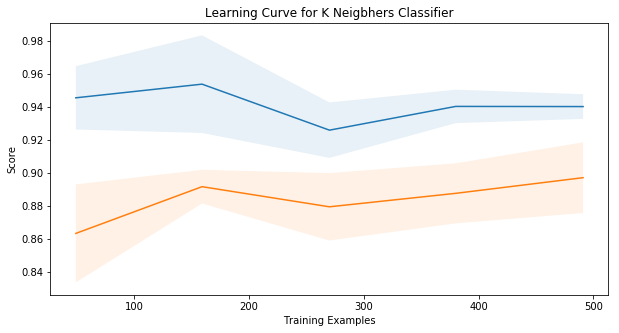

In [36]:

plt.figure(figsize=[10,5])
plt.title('Learning Curve for K Neigbhers Classifier')
plt.xlabel('Training Examples')
plt.ylabel('Score')
train_size_KNC,train_score_KNC,test_score_KNC=learning_curve(estimator=k_neigber_best_param,X=undersample_x_train,y=undersample_y_train)
train_score_mean_KNC=np.mean(train_score_KNC,axis=1)
train_score_std_KNC=np.std(train_score_KNC,axis=1)
test_score_mean_KNC=np.mean(test_score_KNC,axis=1)
test_score_std_KNC=np.std(test_score_KNC,axis=1)

plt.fill_between(train_size_KNC,train_score_mean_KNC-train_score_std_KNC,train_score_mean_KNC+train_score_std_KNC,alpha=0.1)
plt.fill_between(train_size_KNC,test_score_mean_KNC-test_score_std_KNC,test_score_mean_KNC+test_score_std_KNC,alpha=0.1)
plt.plot(train_size_KNC,train_score_mean_KNC,label='Training Score')
plt.plot(train_size_KNC,test_score_mean_KNC,label='Testing Score')
plt.show()

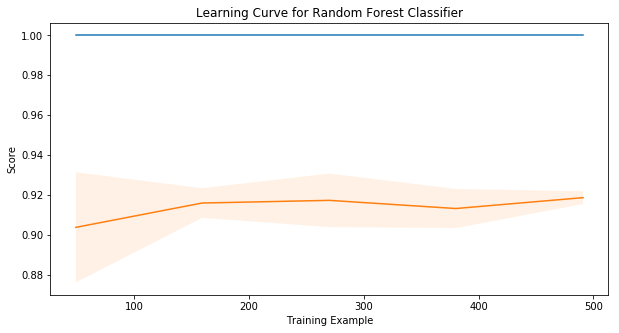

In [37]:
plt.figure(figsize=[10,5])
plt.title('Learning Curve for Random Forest Classifier')
plt.xlabel('Training Example')
plt.ylabel('Score')
train_sizes_RFC,train_score_RFC,test_score_RFC=learning_curve(estimator=random_forest_best_param,X=undersample_x_train,y=undersample_y_train)
train_score_mean_RFC=np.mean(train_score_RFC,axis=1)
train_score_std_RFC=np.std(train_score_RFC,axis=1)
test_score_mean_RFC=np.mean(test_score_RFC,axis=1)
test_score_std_RFC=np.std(test_score_RFC,axis=1)

plt.fill_between(train_sizes_RFC,train_score_mean_RFC-train_score_std_RFC,train_score_mean_RFC+train_score_std_RFC,alpha=0.1)
plt.fill_between(train_sizes_RFC,test_score_mean_RFC-test_score_std_RFC,test_score_mean_RFC+test_score_std_RFC,alpha=0.1)
plt.plot(train_sizes_RFC,train_score_mean_RFC,label='Training Score')
plt.plot(train_sizes_RFC,test_score_mean_RFC,label='Testing Score')
plt.show()

In [38]:
original_x_test=original_x_test[undersample_x_train.columns]

In [46]:
from sklearn.metrics import confusion_matrix
org_y_pred=random_forest_best_param.predict(original_x_test)
confusion_matrix(original_y_test,org_y_pred)

array([[26281,  2151],
       [    0,    49]])

<h2>ROC Curve</h2>

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict

LR_pred=cross_val_predict(log_reg_best_param,original_x_test,original_y_test)
KNC_pred=cross_val_predict(k_neigber_best_param,original_x_test,original_y_test)
RFC_pred=cross_val_predict(random_forest_best_param,original_x_test,original_y_test)

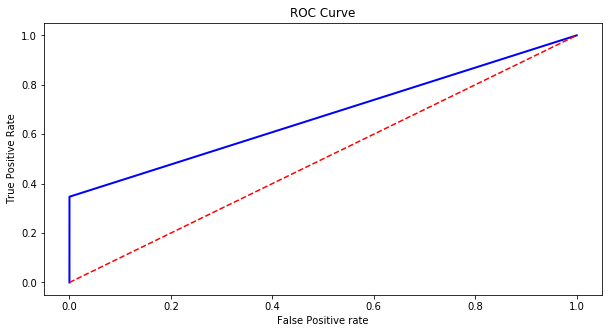

In [47]:
fpr_LR,tpr_LR,threshold_LR=roc_curve(y_true=original_y_test,y_score=RFC_pred)
plt.figure(figsize=[10,5])
plt.title('ROC Curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_LR,tpr_LR,'b-',linewidth=2)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [48]:
roc_auc_score(original_y_test,RFC_pred)

0.6734342161175105

In [49]:
from sklearn.metrics import f1_score
f1_score=f1_score(original_y_test,org_y_pred)
f1_score

0.043574922187638955

In [50]:
from sklearn.metrics import average_precision_score
average_precision_score(original_y_test,RFC_pred)

0.31154246045878065

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
precison_score,recall_score,threshold_value=precision_recall_curve(original_y_test,RFC_pred)

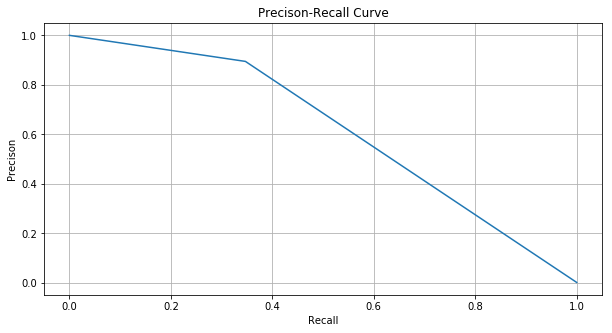

In [52]:
plt.figure(figsize=[10,5])
plt.title('Precison-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
#step_kwargs = ({'step': 'post'}
 #              if 'step' in signature(plt.fill_between).parameters
  #             else {})
#plt.step(recall_score,precison_score,alpha=0.2)

plt.plot(recall_score,precison_score,alpha=2)
plt.grid()
plt.show()